# Imports

In [2]:
%load_ext autoreload
%autoreload all
from helper_mid import *
from __init__ import data_path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


visions.backends INFO  Pandas backend loaded 1.5.3
visions.backends INFO  Numpy backend loaded 1.23.5
visions.backends INFO  Pyspark backend NOT loaded
visions.backends INFO  Python backend loaded


In [3]:
import os

# Data

In [4]:
df_clean = pd.read_csv(os.path.join(data_path,'clean', 'clean.csv'), index_col=0, parse_dates=['Timestamp', 'Date'])
df_lag =  pd.read_csv(os.path.join(data_path,'clean','clean_lagged.csv'), index_col=0, parse_dates=['Timestamp', 'Date'])

In [5]:
df_clean.columns

Index(['DK_1_imports', 'SE_4_imports', 'DK_1_exports', 'SE_4_exports',
       'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load', 'Solar_[MW]',
       'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Year', 'Quarter', 'Month',
       'Date', 'Day', 'Weekday', 'Hour', 'Week', 'business', 'Wind Total'],
      dtype='object')

In [6]:
df_lag.columns

Index(['DK_1_imports', 'SE_4_imports', 'DK_1_exports', 'SE_4_exports',
       'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load', 'Solar_[MW]',
       'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Year', 'Quarter', 'Month',
       'Date', 'Day', 'Weekday', 'Hour', 'Week', 'business', 'Wind Total',
       'DAP-lag24', 'DAP-lag36', 'DAP-lag48', 'DAP-lag72', 'DAP-lag168',
       'DAP-lag-168'],
      dtype='object')

In [7]:
old = ['Solar_[MW]','Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]']
new = ['Solar_MW','Biomass_Actual_Aggregated_MW','Waste_Actual_Aggregated_MW']

In [8]:
df_lag.rename(columns=dict(zip(old,new)), inplace = True)

In [9]:
df_lag.columns

Index(['DK_1_imports', 'SE_4_imports', 'DK_1_exports', 'SE_4_exports',
       'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load', 'Solar_MW',
       'ttf_price', 'coal_price', 'co2_price', 'Biomass_Actual_Aggregated_MW',
       'Waste_Actual_Aggregated_MW', 'DE_LU_AT_imports', 'DE_LU_AT_exports',
       'Year', 'Quarter', 'Month', 'Date', 'Day', 'Weekday', 'Hour', 'Week',
       'business', 'Wind Total', 'DAP-lag24', 'DAP-lag36', 'DAP-lag48',
       'DAP-lag72', 'DAP-lag168', 'DAP-lag-168'],
      dtype='object')

In [10]:
df_lag.isna().sum()

DK_1_imports                      0
SE_4_imports                      0
DK_1_exports                      0
SE_4_exports                      0
Day_Ahead_price                   0
Forecasted_Load                   0
Actual_Load                       0
Solar_MW                          0
ttf_price                         0
coal_price                        0
co2_price                         0
Biomass_Actual_Aggregated_MW      0
Waste_Actual_Aggregated_MW        0
DE_LU_AT_imports                  0
DE_LU_AT_exports                  0
Year                              0
Quarter                           0
Month                             0
Date                              0
Day                               0
Weekday                           0
Hour                              0
Week                              0
business                          0
Wind Total                        0
DAP-lag24                        24
DAP-lag36                        36
DAP-lag48                   

In [11]:
df_lag.dropna(axis = 0, how = 'any', inplace = True)

In [12]:
df_lag.head()

DK_1_imports  SE_4_imports  DK_1_exports  SE_4_exports  \
Timestamp                                                                     
2018-01-09 00:00:00           1.0           0.0         129.0         560.0   
2018-01-09 01:00:00          84.0           0.0           2.0         874.0   
2018-01-09 02:00:00          73.0           0.0           0.0         679.0   
2018-01-09 03:00:00         141.0           0.0           0.0         714.0   
2018-01-09 04:00:00         163.0           0.0           0.0         643.0   

                     Day_Ahead_price  Forecasted_Load  Actual_Load  Solar_MW  \
Timestamp                                                                      
2018-01-09 00:00:00            27.17           1309.0       1309.0       0.0   
2018-01-09 01:00:00            22.10           1233.0       1221.0       0.0   
2018-01-09 02:00:00             9.79           1186.0       1155.0       0.0   
2018-01-09 03:00:00             4.99           1175.0       1139.0       0.0   
2018-01-09 04:00:00             9.24           1184.0       1125.0       0.0   

                     ttf_price  coal_price  ...  Hour  Week  business  \
Timestamp                                   ...                         
2018-01-09 00:00:00  19.434999       107.0  ...     0     2      True   
2018-01-09 01:00:00  19.434999       107.0  ...     1     2      True   
2018-01-09 02:00:00  19.434999       107.0  ...     2     2      True   
2018-01-09 03:00:00  19.434999       107.0  ...     3     2      True   
2018-01-09 04:00:00  19.434999       107.0  ...     4     2      True   

                     Wind Total  DAP-lag24  DAP-lag36  DAP-lag48  DAP-lag72  \
Timestamp                                                                     
2018-01-09 00:00:00       393.0      25.03      28.96      27.58      29.45   
2018-01-09 01:00:00       439.0      23.96      28.27      25.90      28.55   
2018-01-09 02:00:00       441.0      23.92      28.29      25.89      28.18   
2018-01-09 03:00:00       457.0      25.48      28.62      26.16      28.00   
2018-01-09 04:00:00       480.0      26.12      29.38      26.60      28.15   

                    DAP-lag168  DAP-lag-168  
Timestamp                                    
2018-01-09 00:00:00      18.12        -9.61  
2018-01-09 01:00:00      14.99        -6.62  
2018-01-09 02:00:00      17.79        -2.33  
2018-01-09 03:00:00      24.51        -4.92  
2018-01-09 04:00:00      17.82        -0.08  

[5 rows x 31 columns]

# Models

In [13]:
# setting up features and target
cols_std = ['DK_1_imports', 'SE_4_imports', 'DK_1_exports',
            'SE_4_exports', 'Forecasted_Load', 'Actual_Load',
          'Solar_MW', 'ttf_price', 'coal_price', 'co2_price',
            'Biomass_Actual_Aggregated_MW', 'Waste_Actual_Aggregated_MW',
            'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Wind Total',
            'DAP-lag24', 'DAP-lag36', 'DAP-lag48', 'DAP-lag72', 'DAP-lag168'
            ] 

features = cols_std + ['Quarter', 'Month', 'Year', 'Weekday', 'Hour', 'Week', 'business']
target = 'Day_Ahead_price'

In [14]:
# setting up splits
train_start = pd.to_datetime(['2018-01-09', '2021-01-01', '2021-08-01'], format = '%Y-%m-%d')
k_folds = len(train_start)

df_lag.columns

Index(['DK_1_imports', 'SE_4_imports', 'DK_1_exports', 'SE_4_exports',
       'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load', 'Solar_MW',
       'ttf_price', 'coal_price', 'co2_price', 'Biomass_Actual_Aggregated_MW',
       'Waste_Actual_Aggregated_MW', 'DE_LU_AT_imports', 'DE_LU_AT_exports',
       'Year', 'Quarter', 'Month', 'Date', 'Day', 'Weekday', 'Hour', 'Week',
       'business', 'Wind Total', 'DAP-lag24', 'DAP-lag36', 'DAP-lag48',
       'DAP-lag72', 'DAP-lag168', 'DAP-lag-168'],
      dtype='object')

In [15]:
k_folds

3

## Split - Method = 0
The approach is to train and test in consecutive/sequential blocks, devoting 85% to training and 15% to test.

In [16]:
split_method = 0

### Baseline

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00


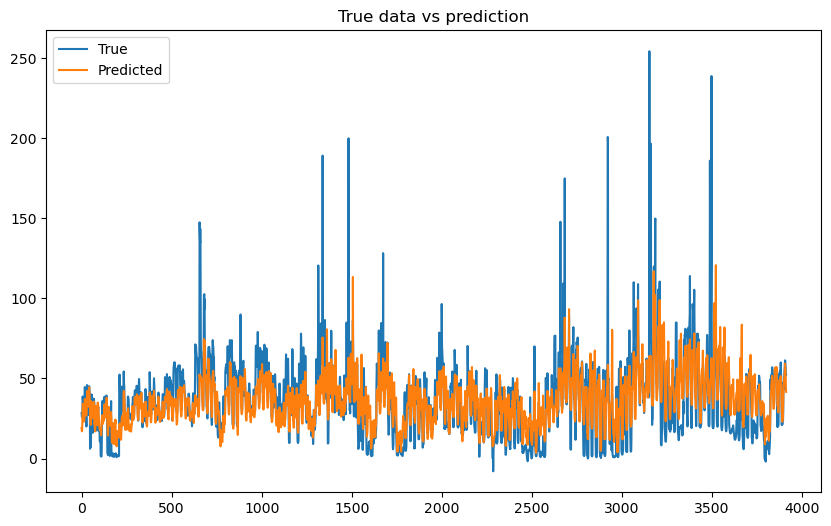

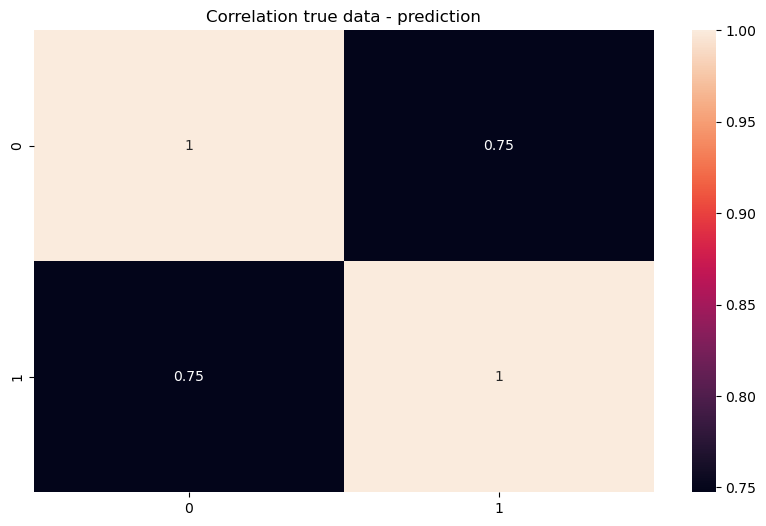

	r^2=0.542520
Mean Absolute Error (MAE): 10.569450456874483
Mean Squared Error (MSE): 248.84814309770087
Root Mean Squared Error (RMSE): 15.774921334120842
Mean Absolute Percentage Error (MAPE): 141.76
Accuracy: -41.76
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00


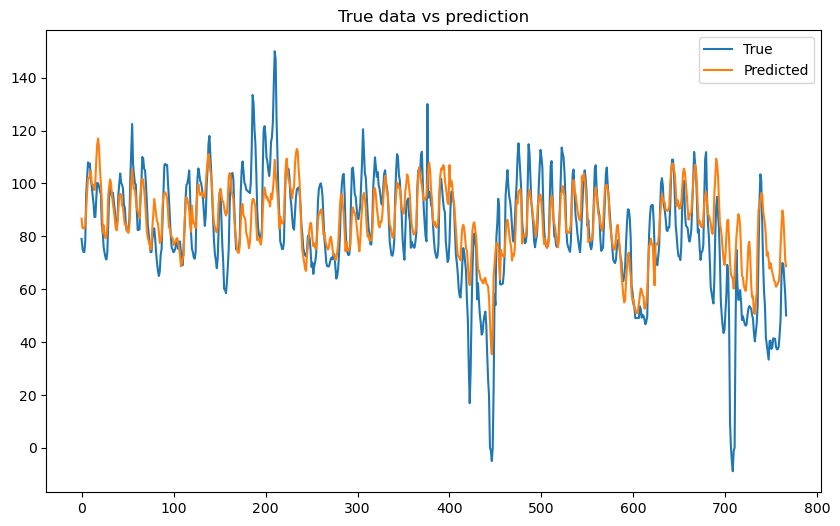

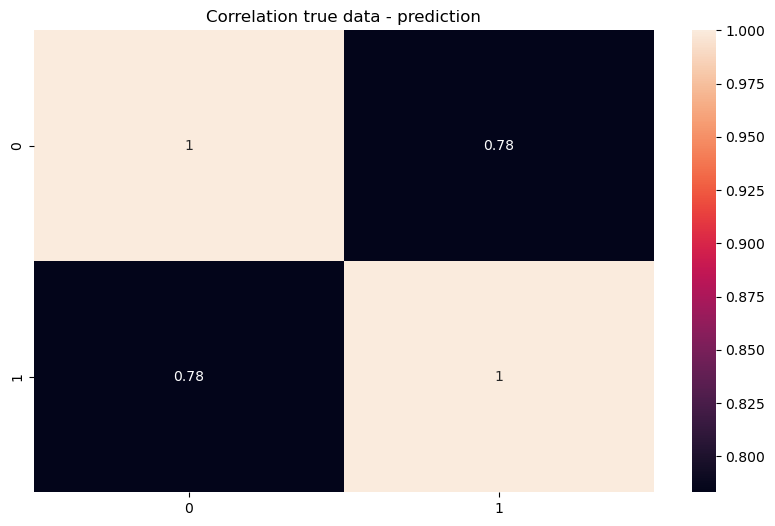

	r^2=0.554694
Mean Absolute Error (MAE): 10.547287305817292
Mean Squared Error (MSE): 207.7912807948142
Root Mean Squared Error (RMSE): 14.414967249175914
Mean Absolute Percentage Error (MAPE): 901.47
Accuracy: -801.47
Iteration  2
train 2021-08-01 00:00:00 - 2023-01-06 23:00:00, test 2023-01-07 00:00:00 - 2023-04-08 23:00:00


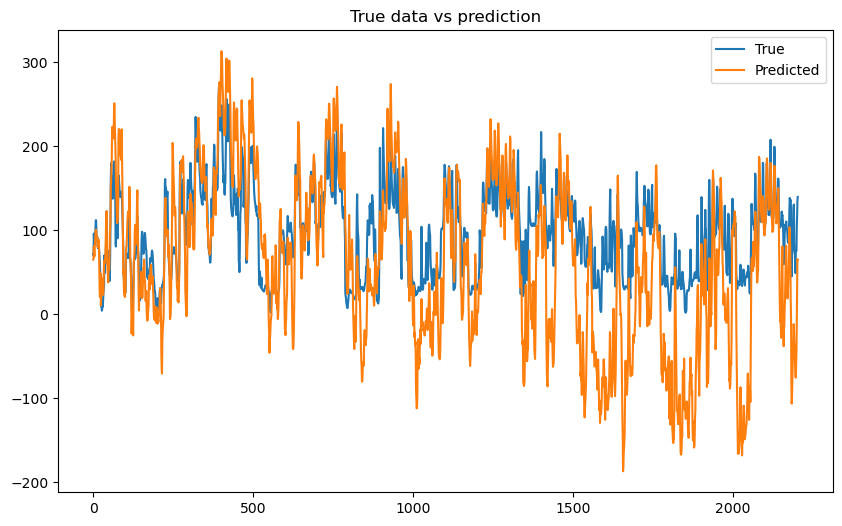

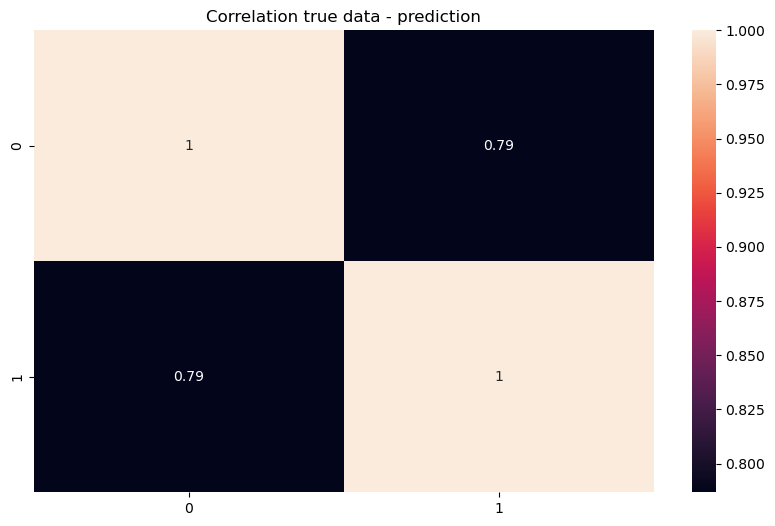

	r^2=-1.057799
Mean Absolute Error (MAE): 57.184146107751886
Mean Squared Error (MSE): 5527.518161416867
Root Mean Squared Error (RMSE): 74.34728079369727
Mean Absolute Percentage Error (MAPE): 122.89
Accuracy: -22.89


In [17]:
lr_pred_0, lr_model_0 = run_model('lr', df_lag, k_folds, split_method,
                                         train_start, features, target, cols_std)

### Random Forest

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00


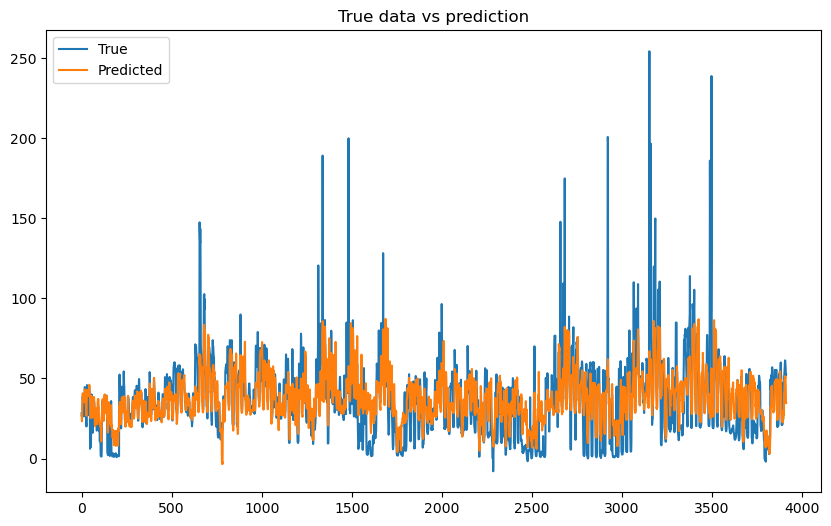

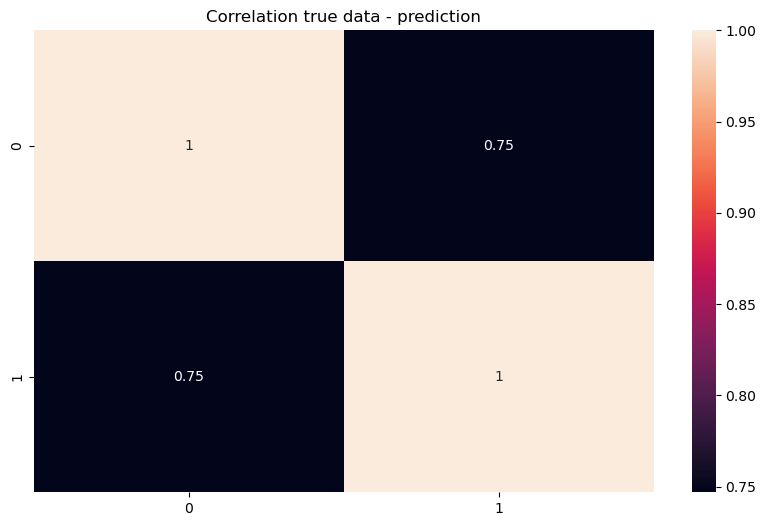

	r^2=0.532007
Mean Absolute Error (MAE): 10.529732155899186
Mean Squared Error (MSE): 254.56701053148498
Root Mean Squared Error (RMSE): 15.955156236511286
Mean Absolute Percentage Error (MAPE): 159.9
Accuracy: -59.9
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00


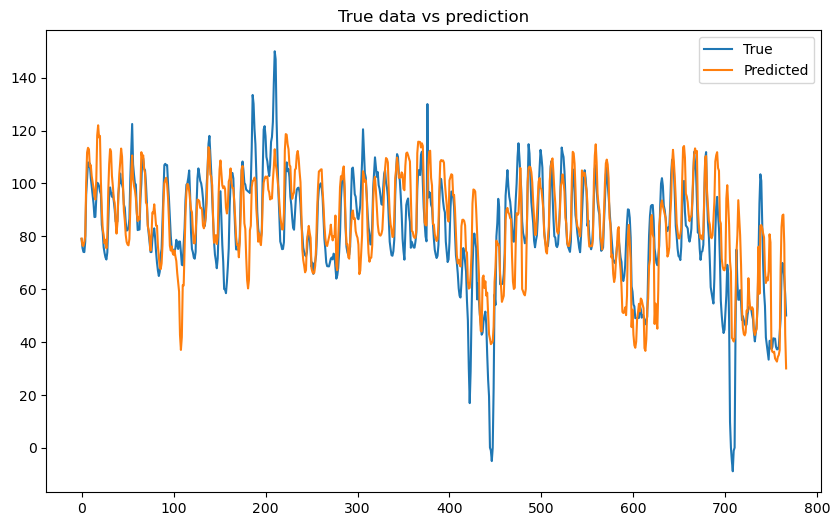

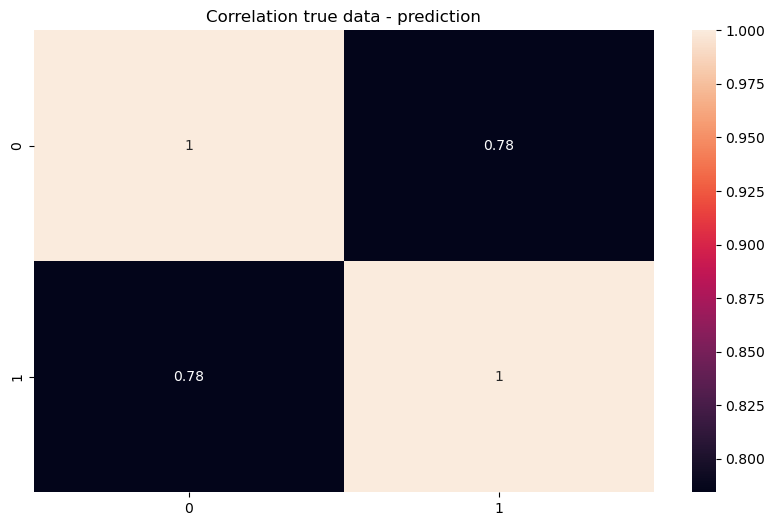

	r^2=0.593168
Mean Absolute Error (MAE): 10.142533937034761
Mean Squared Error (MSE): 189.83860299840586
Root Mean Squared Error (RMSE): 13.778193023702558
Mean Absolute Percentage Error (MAPE): 789.86
Accuracy: -689.86
Iteration  2
train 2021-08-01 00:00:00 - 2023-01-06 23:00:00, test 2023-01-07 00:00:00 - 2023-04-08 23:00:00


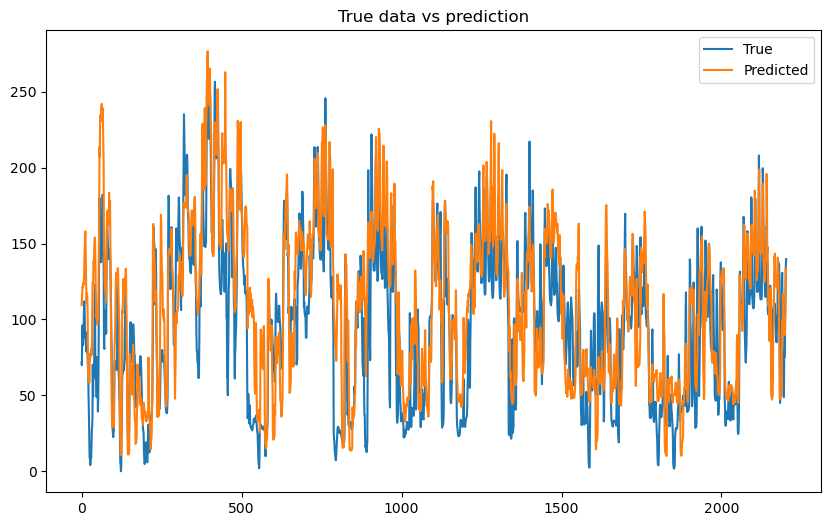

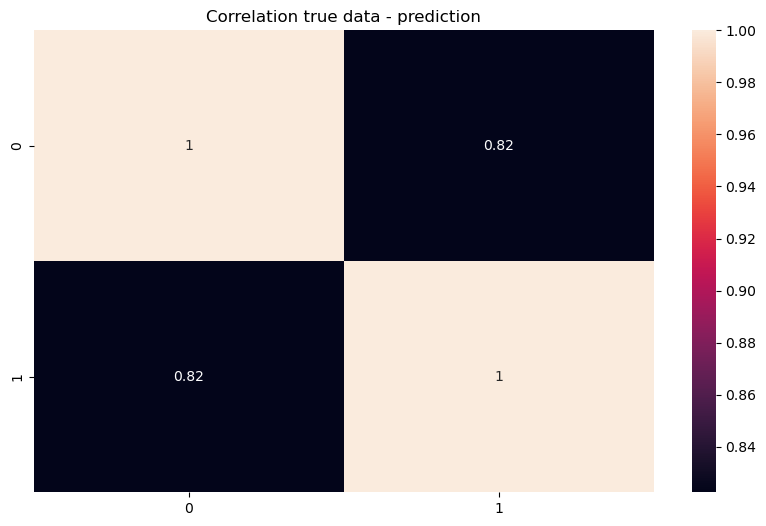

	r^2=0.590782
Mean Absolute Error (MAE): 26.16034698886252
Mean Squared Error (MSE): 1099.2122258185627
Root Mean Squared Error (RMSE): 33.15436963385917
Mean Absolute Percentage Error (MAPE): 62.38
Accuracy: 37.62


In [18]:
rf_pred_0, rf_models_0 = run_model('rf', df_lag, k_folds, split_method, train_start, features, target, cols_std)

### XGBoost

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00


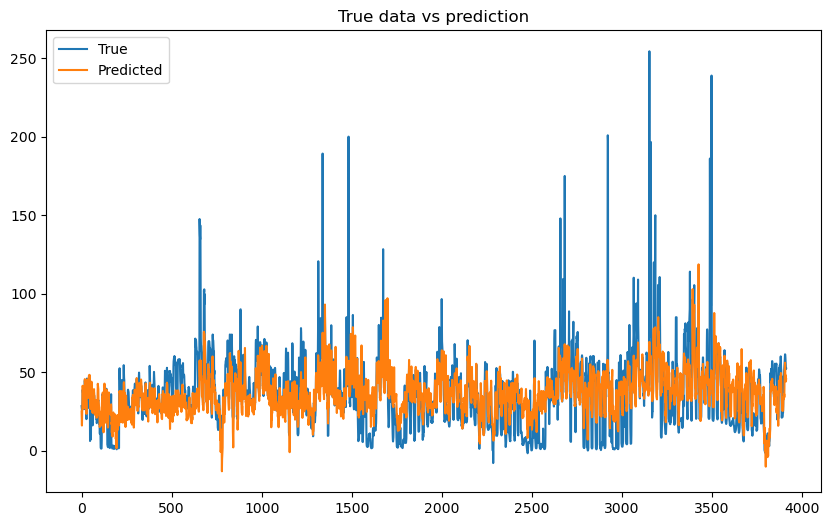

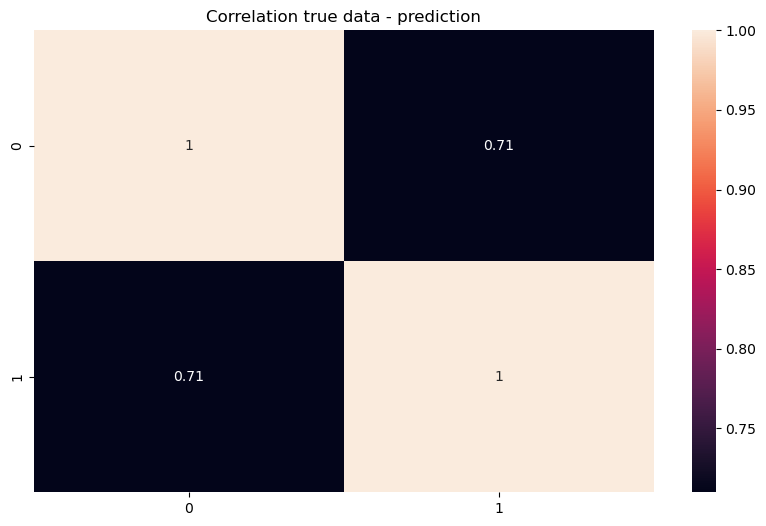

	r^2=0.479770
Mean Absolute Error (MAE): 11.487988489063452
Mean Squared Error (MSE): 282.98162886238885
Root Mean Squared Error (RMSE): 16.822057807010083
Mean Absolute Percentage Error (MAPE): 184.63
Accuracy: -84.63
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00


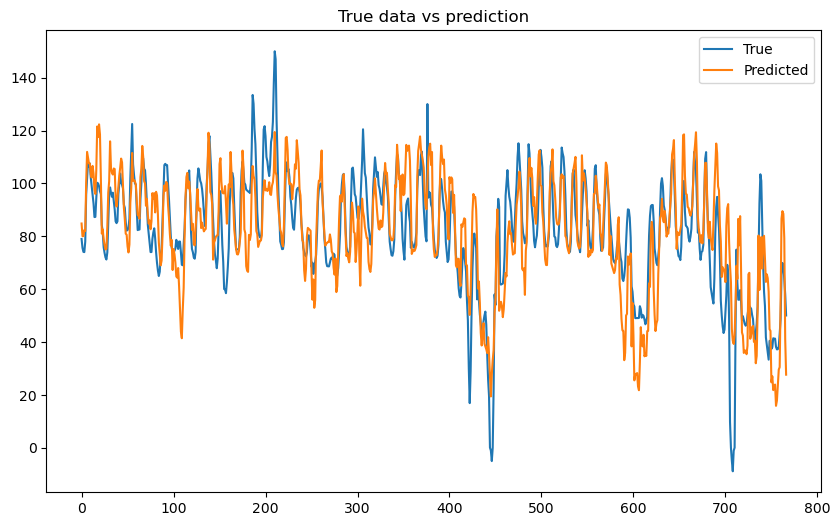

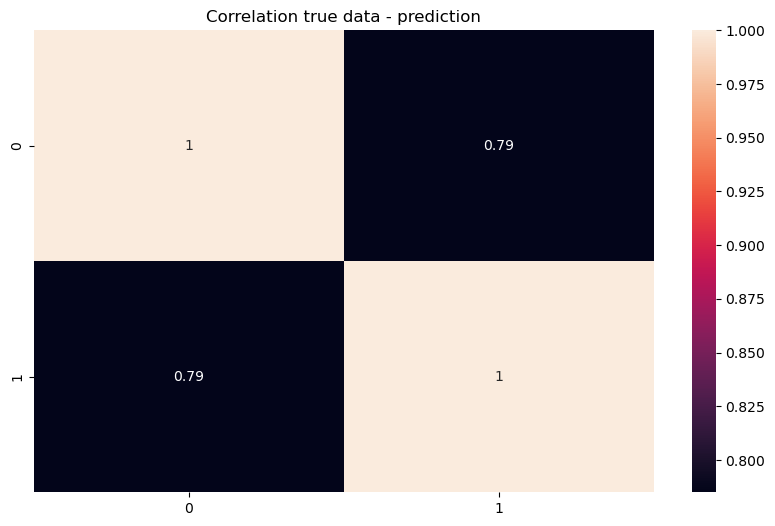

	r^2=0.575277
Mean Absolute Error (MAE): 10.801185254839282
Mean Squared Error (MSE): 198.18677649603447
Root Mean Squared Error (RMSE): 14.07788252884767
Mean Absolute Percentage Error (MAPE): 672.34
Accuracy: -572.34
Iteration  2
train 2021-08-01 00:00:00 - 2023-01-06 23:00:00, test 2023-01-07 00:00:00 - 2023-04-08 23:00:00


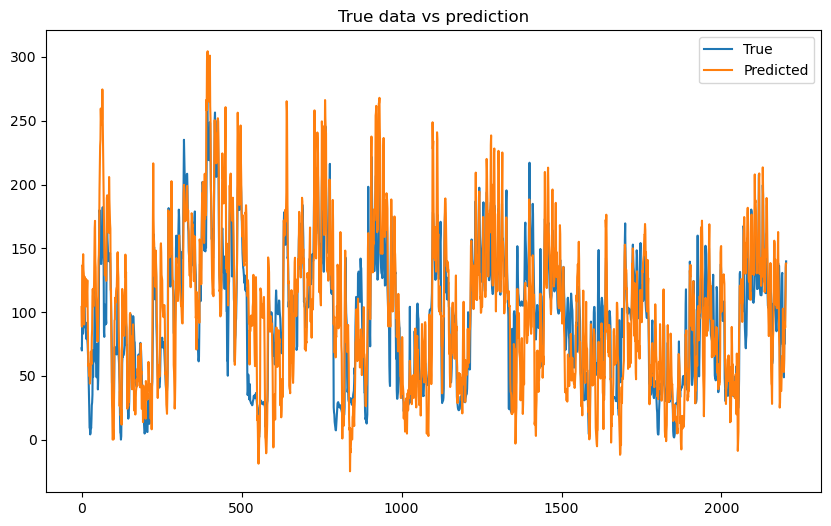

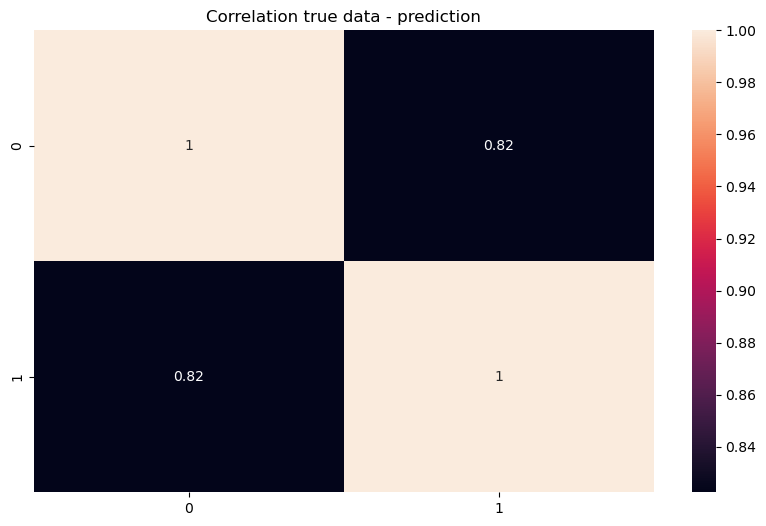

	r^2=0.569603
Mean Absolute Error (MAE): 26.896789769842798
Mean Squared Error (MSE): 1156.1032569741244
Root Mean Squared Error (RMSE): 34.00151845100634
Mean Absolute Percentage Error (MAPE): 58.16
Accuracy: 41.84


In [19]:
xgb_pred_0, xgb_models_0 = run_model('xgb', df_lag, k_folds, split_method, train_start, features, target, cols_std,'short_term')

### Gradient Boost

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00


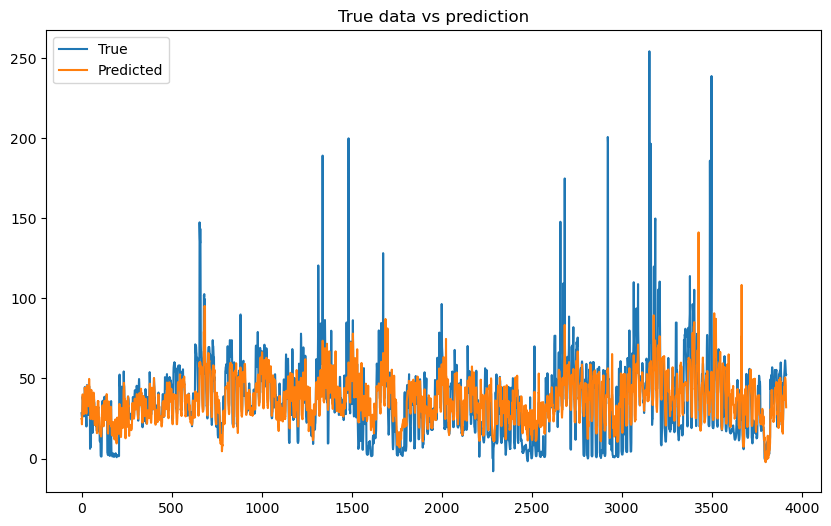

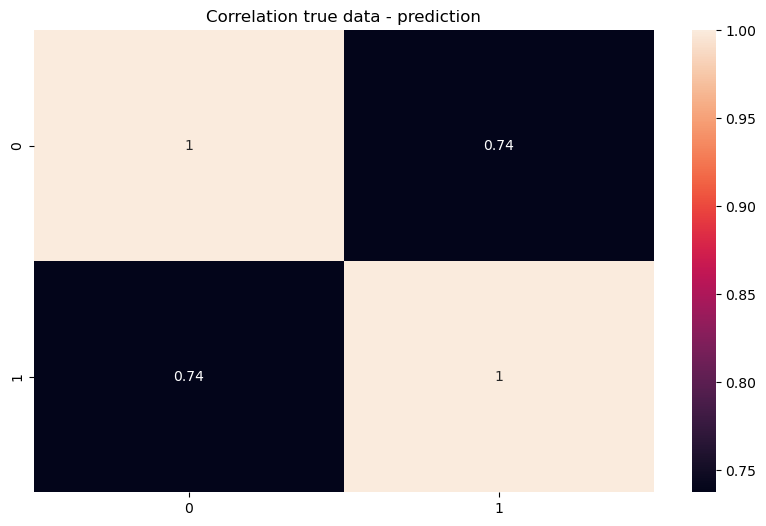

	r^2=0.521534
Mean Absolute Error (MAE): 10.652197051836179
Mean Squared Error (MSE): 260.2636338042625
Root Mean Squared Error (RMSE): 16.132688362584286
Mean Absolute Percentage Error (MAPE): 163.07
Accuracy: -63.07
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00


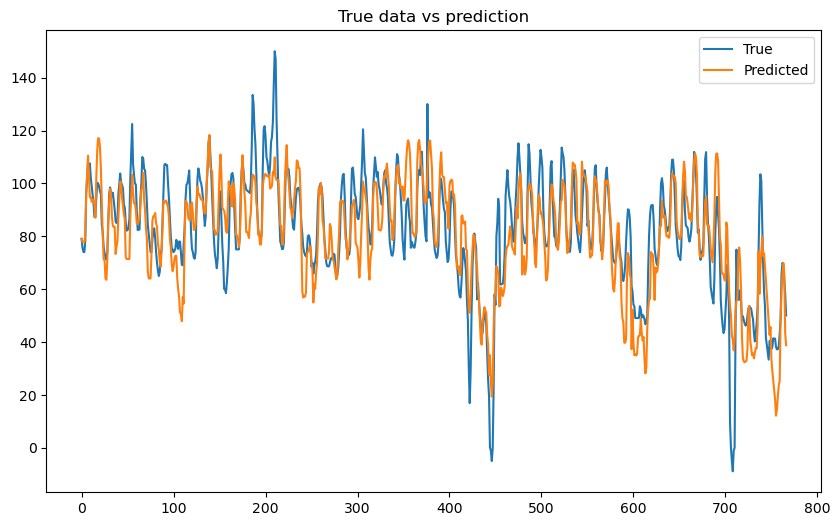

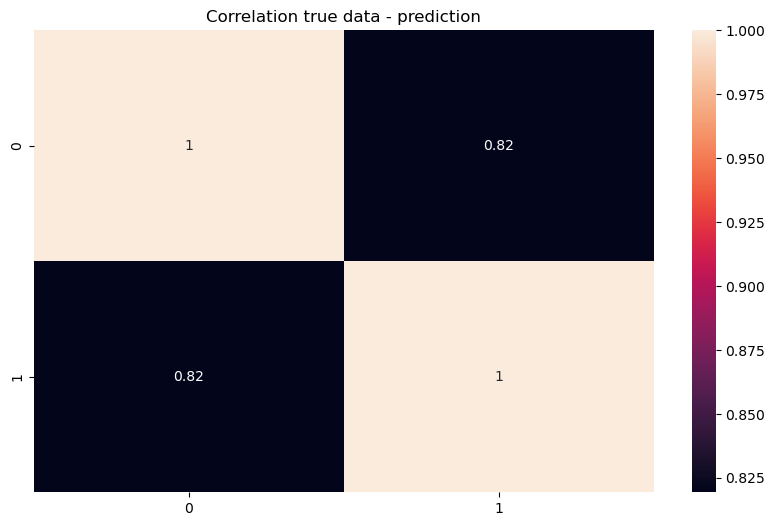

	r^2=0.653520
Mean Absolute Error (MAE): 9.782842717008915
Mean Squared Error (MSE): 161.6766312866763
Root Mean Squared Error (RMSE): 12.715212593058611
Mean Absolute Percentage Error (MAPE): 541.43
Accuracy: -441.43
Iteration  2
train 2021-08-01 00:00:00 - 2023-01-06 23:00:00, test 2023-01-07 00:00:00 - 2023-04-08 23:00:00


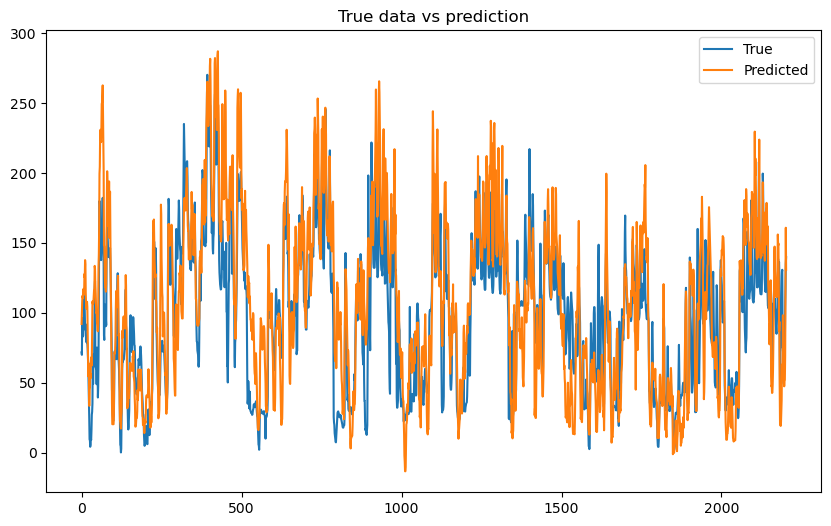

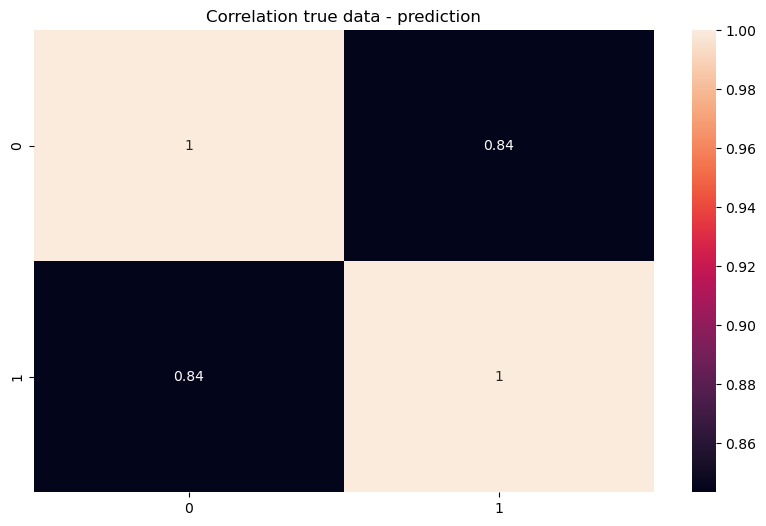

	r^2=0.570917
Mean Absolute Error (MAE): 26.865334037818286
Mean Squared Error (MSE): 1152.5747360237485
Root Mean Squared Error (RMSE): 33.94959110245289
Mean Absolute Percentage Error (MAPE): 54.15
Accuracy: 45.85


In [20]:
gb_0 = run_model('gb', df_lag, k_folds, split_method, train_start, features, target, cols_std)

### LSTM

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00
Epoch 1/10
278/278 [==============================] - 5s 12ms/step - loss: 426.0347 - val_loss: 288.0555
Epoch 2/10
278/278 [==============================] - 3s 10ms/step - loss: 138.0449 - val_loss: 189.0471
Epoch 3/10
278/278 [==============================] - 3s 10ms/step - loss: 116.6223 - val_loss: 165.2545
Epoch 4/10
278/278 [==============================] - 3s 10ms/step - loss: 112.5736 - val_loss: 173.5732
Epoch 5/10
278/278 [==============================] - 3s 10ms/step - loss: 107.9309 - val_loss: 146.7484
Epoch 6/10
278/278 [==============================] - 3s 10ms/step - loss: 104.1165 - val_loss: 170.0028
Epoch 7/10
278/278 [==============================] - 3s 10ms/step - loss: 98.7235 - val_loss: 142.0519
Epoch 8/10
278/278 [==============================] - 3s 10ms/step - loss: 92.7416 - val_loss: 118.5056
Epoch 9/10
278/278 [==============================] -

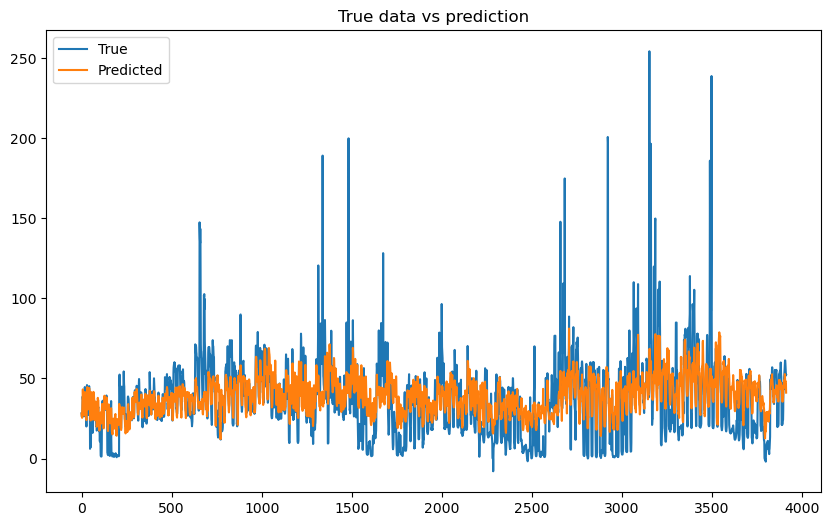

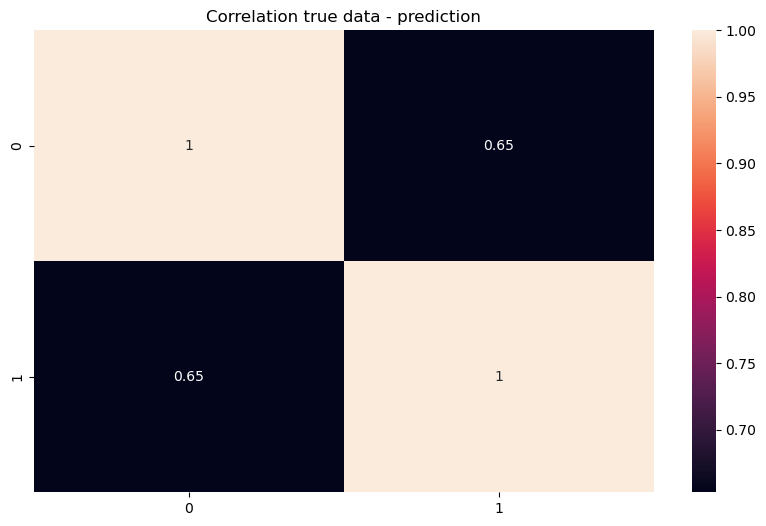

	r^2=0.381062
Mean Absolute Error (MAE): 12.765297385617512
Mean Squared Error (MSE): 336.6738859768243
Root Mean Squared Error (RMSE): 18.34867531940179
Mean Absolute Percentage Error (MAPE): 219.91
Accuracy: -119.91
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00
Epoch 1/10
54/54 [==============================] - 2s 17ms/step - loss: 2158.5872 - val_loss: 2114.6704
Epoch 2/10
54/54 [==============================] - 1s 11ms/step - loss: 536.6501 - val_loss: 832.0552
Epoch 3/10
54/54 [==============================] - 1s 11ms/step - loss: 473.1252 - val_loss: 908.2527
Epoch 4/10
54/54 [==============================] - 1s 10ms/step - loss: 454.7146 - val_loss: 822.2324
Epoch 5/10
54/54 [==============================] - 1s 11ms/step - loss: 412.5345 - val_loss: 640.1984
Epoch 6/10
54/54 [==============================] - 1s 12ms/step - loss: 389.8739 - val_loss: 654.2807
Epoch 7/10
54/54 [==============================] - 1

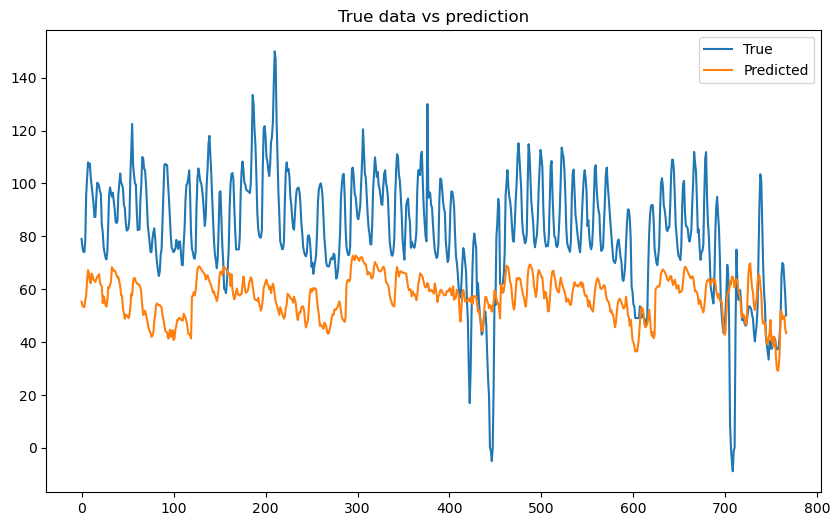

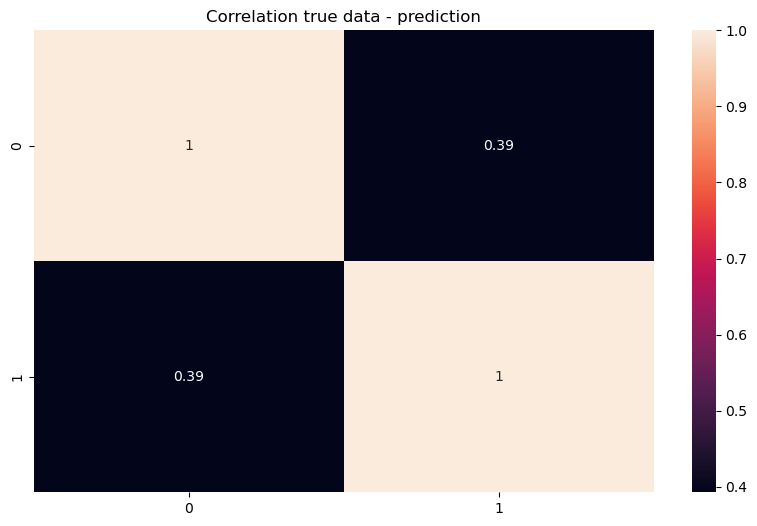

	r^2=-1.142953
Mean Absolute Error (MAE): 27.53935365619684
Mean Squared Error (MSE): 999.9581878046637
Root Mean Squared Error (RMSE): 31.622115485916872
Mean Absolute Percentage Error (MAPE): 1021.06
Accuracy: -921.06
Iteration  2
train 2021-08-01 00:00:00 - 2023-01-06 23:00:00, test 2023-01-07 00:00:00 - 2023-04-08 23:00:00
Epoch 1/10
158/158 [==============================] - 3s 12ms/step - loss: 35966.8516 - val_loss: 18230.2148
Epoch 2/10
158/158 [==============================] - 2s 10ms/step - loss: 17144.5078 - val_loss: 10866.1250
Epoch 3/10
158/158 [==============================] - 2s 11ms/step - loss: 10976.2461 - val_loss: 7915.0308
Epoch 4/10
158/158 [==============================] - 2s 11ms/step - loss: 8405.5352 - val_loss: 8737.5410
Epoch 5/10
158/158 [==============================] - 2s 10ms/step - loss: 6615.6338 - val_loss: 9698.3164
Epoch 6/10
158/158 [==============================] - 2s 10ms/step - loss: 5739.4678 - val_loss: 11653.8779
Epoch 7/10
158/158 [===

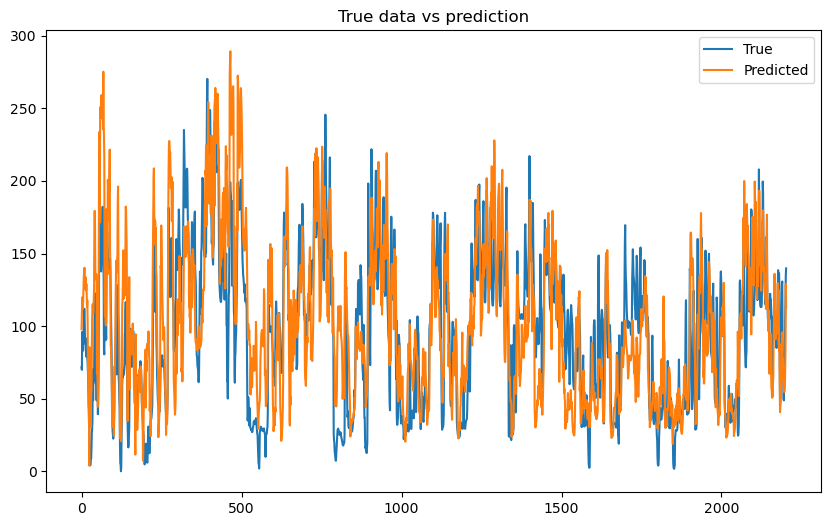

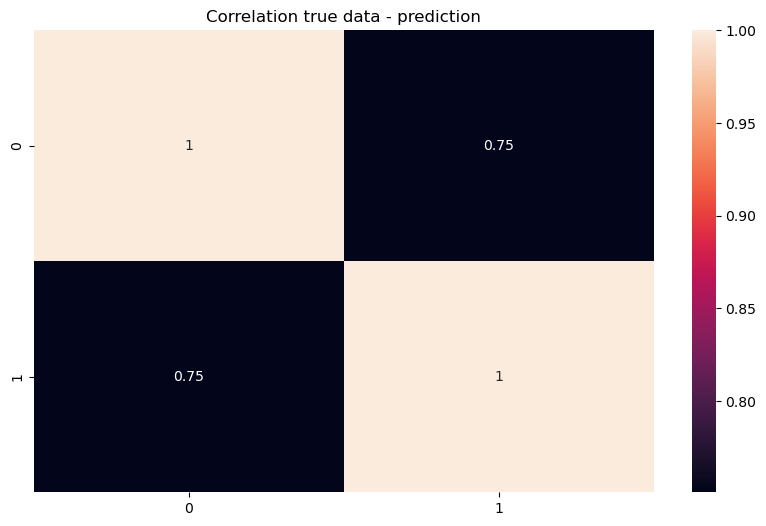

	r^2=0.475857
Mean Absolute Error (MAE): 29.715755363010675
Mean Squared Error (MSE): 1407.9160280413917
Root Mean Squared Error (RMSE): 37.52220713179585
Mean Absolute Percentage Error (MAPE): 65.93
Accuracy: 34.07


In [21]:
lstm_0 = run_model('lstm', df_lag, k_folds, split_method, train_start, features, target, cols_std)

## Split - Method = 1
The approach is to split the data in increasing blocks. The size of the train set increases, whereas the size of the test remains 3 months.

In [22]:
split_method = 1

### Baseline

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


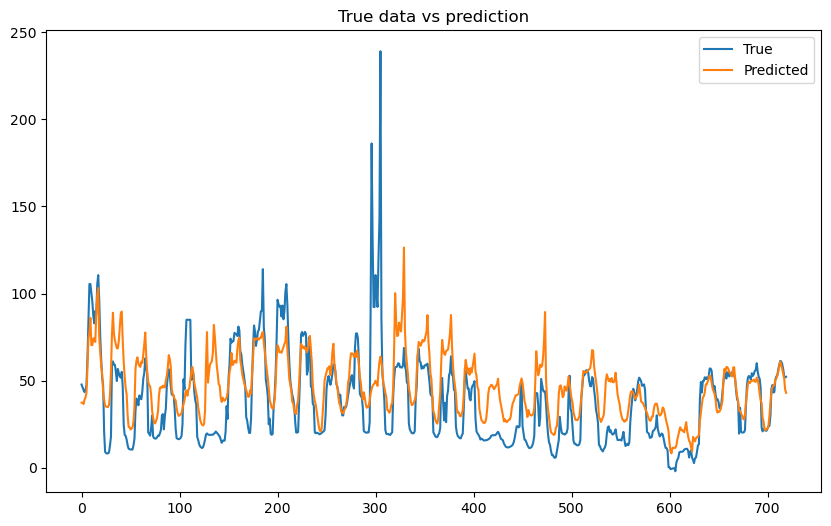

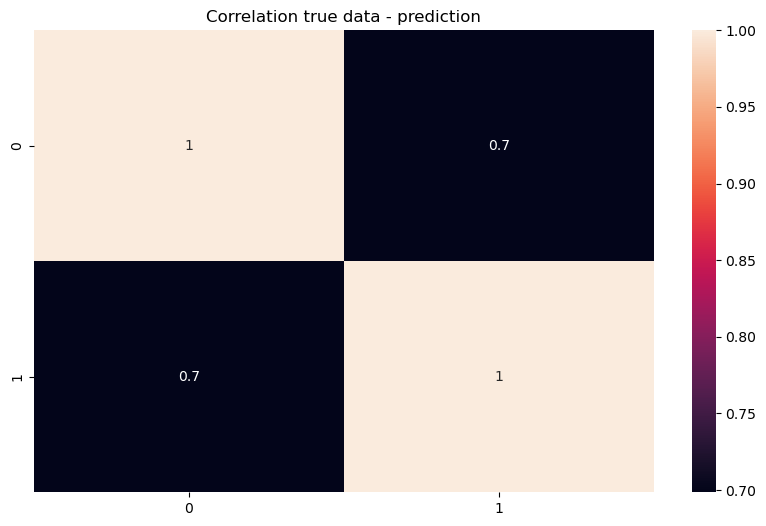

	r^2=0.382372
Mean Absolute Error (MAE): 14.911457320788173
Mean Squared Error (MSE): 406.73109120865547
Root Mean Squared Error (RMSE): 20.1675752436592
Mean Absolute Percentage Error (MAPE): 98.74
Accuracy: 1.26
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


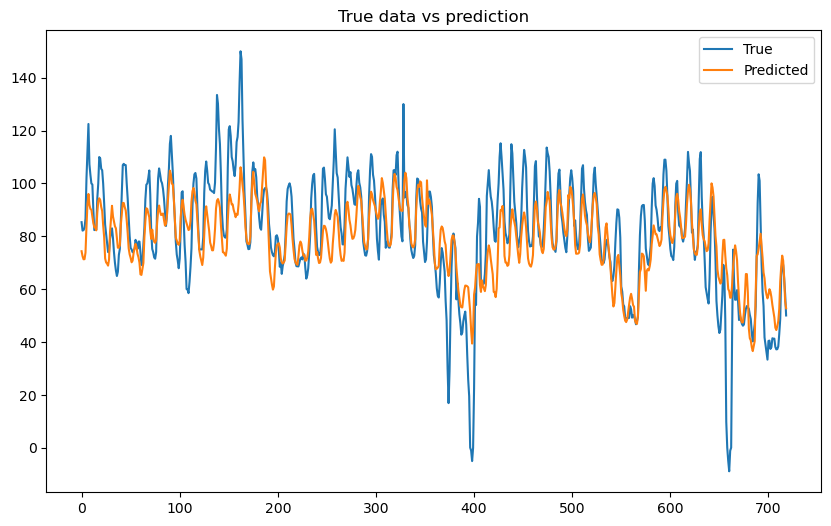

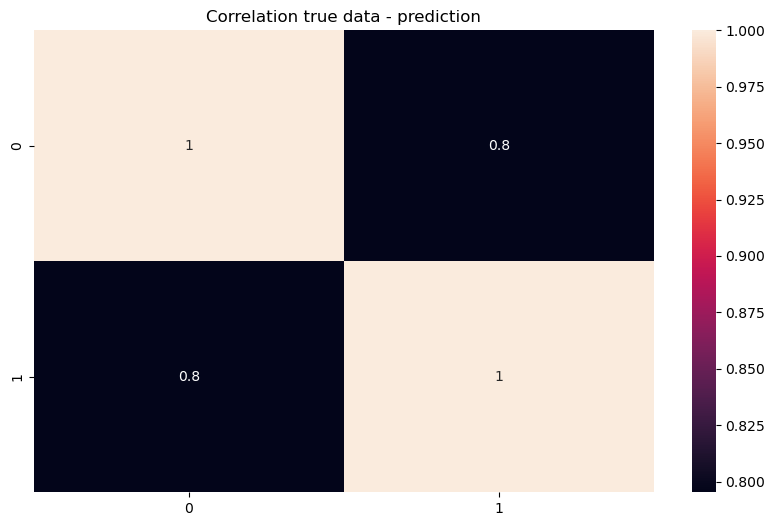

	r^2=0.585683
Mean Absolute Error (MAE): 10.388321719510241
Mean Squared Error (MSE): 200.7854666653609
Root Mean Squared Error (RMSE): 14.169878851470852
Mean Absolute Percentage Error (MAPE): 938.0
Accuracy: -838.0
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-09 23:00:00, test 2023-03-10 00:00:00 - 2023-04-08 23:00:00


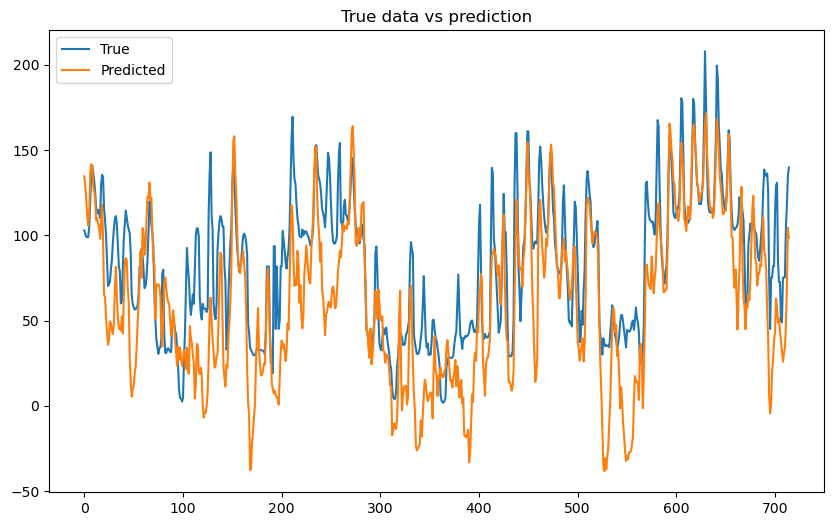

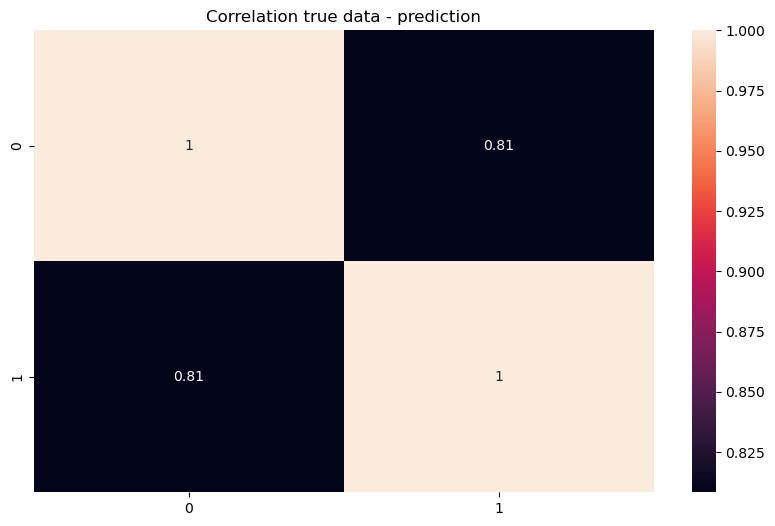

	r^2=0.240361
Mean Absolute Error (MAE): 27.349421566672355
Mean Squared Error (MSE): 1213.0331326097073
Root Mean Squared Error (RMSE): 34.82862518977324
Mean Absolute Percentage Error (MAPE): 51.76
Accuracy: 48.24


In [23]:
lr_pred_1, lr_model_1 = run_model('lr', df_lag, k_folds, split_method,
                                         train_start, features, target, cols_std)

### Random forest

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


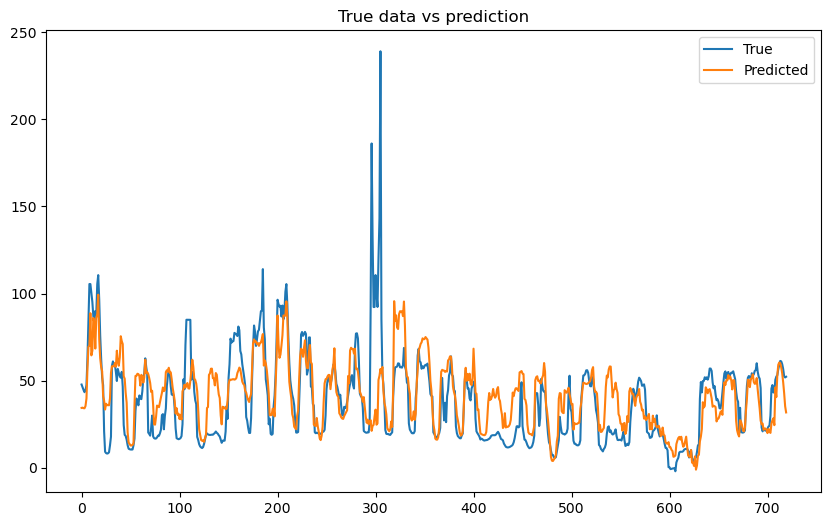

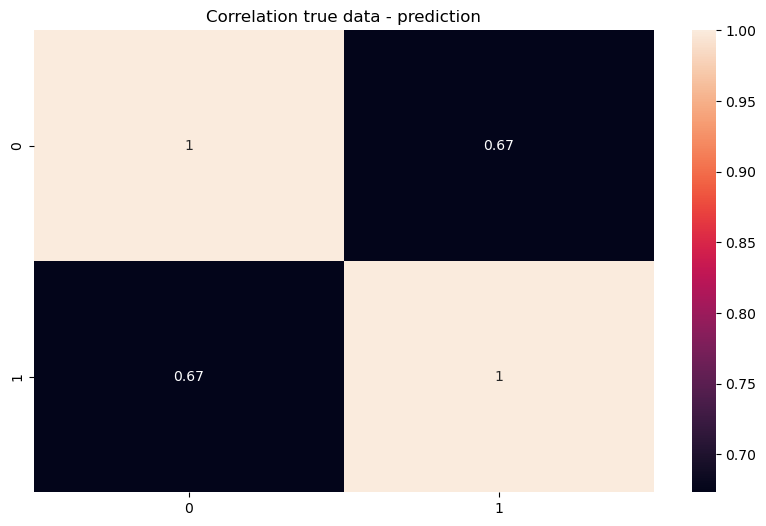

	r^2=0.437223
Mean Absolute Error (MAE): 12.728249023465214
Mean Squared Error (MSE): 370.6093613024561
Root Mean Squared Error (RMSE): 19.251217138208588
Mean Absolute Percentage Error (MAPE): 73.09
Accuracy: 26.91
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


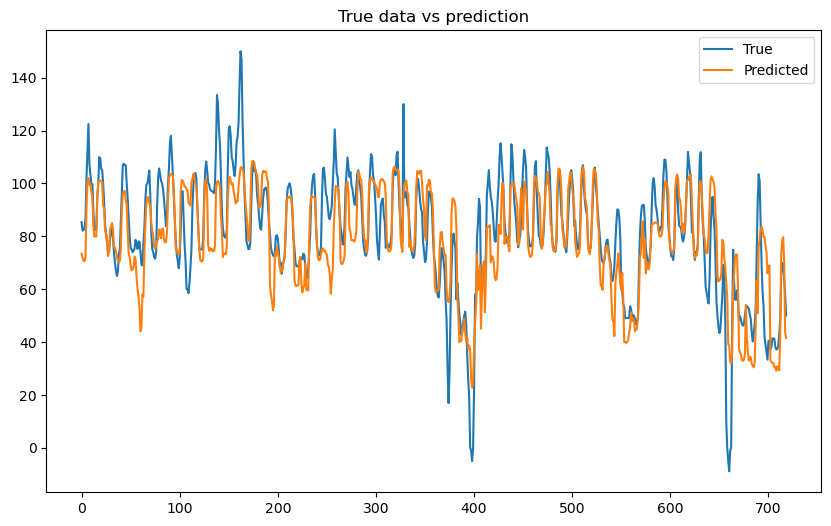

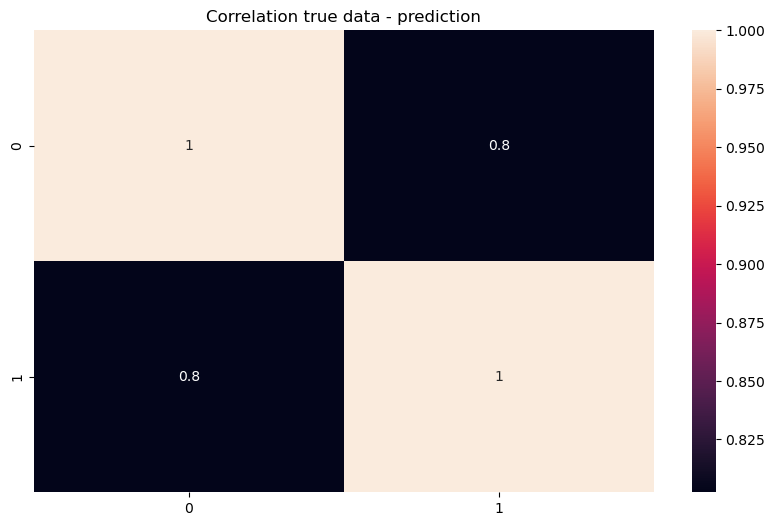

	r^2=0.629600
Mean Absolute Error (MAE): 9.902910782914104
Mean Squared Error (MSE): 179.5024925019774
Root Mean Squared Error (RMSE): 13.397854025998992
Mean Absolute Percentage Error (MAPE): 588.77
Accuracy: -488.77
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-09 23:00:00, test 2023-03-10 00:00:00 - 2023-04-08 23:00:00


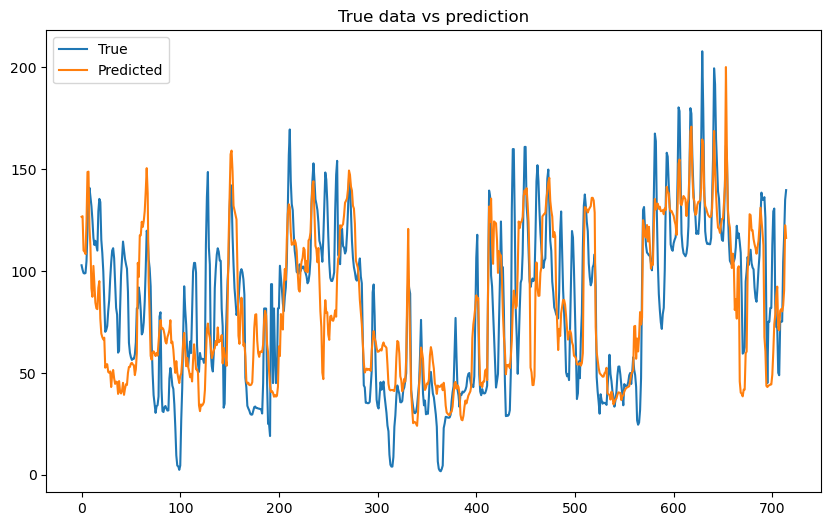

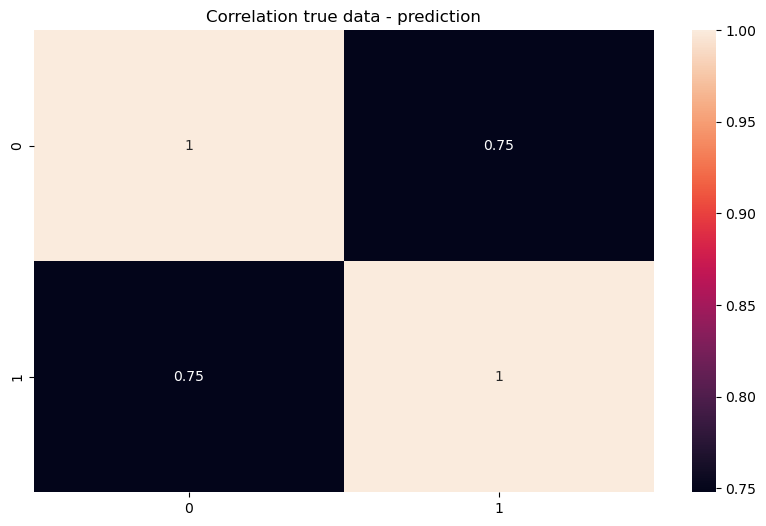

	r^2=0.533852
Mean Absolute Error (MAE): 21.604749610636684
Mean Squared Error (MSE): 744.370297334528
Root Mean Squared Error (RMSE): 27.28315042905654
Mean Absolute Percentage Error (MAPE): 53.24
Accuracy: 46.76


In [24]:
rf_pred_1, rf_models_1 = run_model('rf', df_lag, k_folds, split_method, train_start, features, target, cols_std, 'short_term')

### XGBoost

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


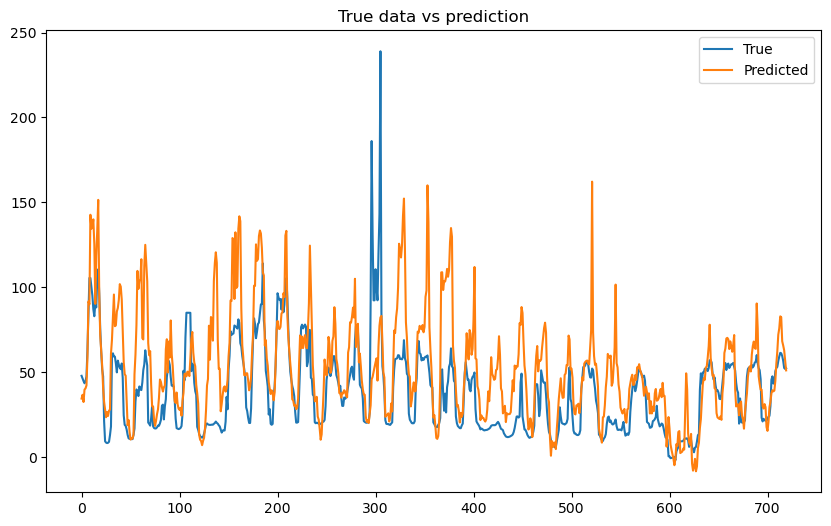

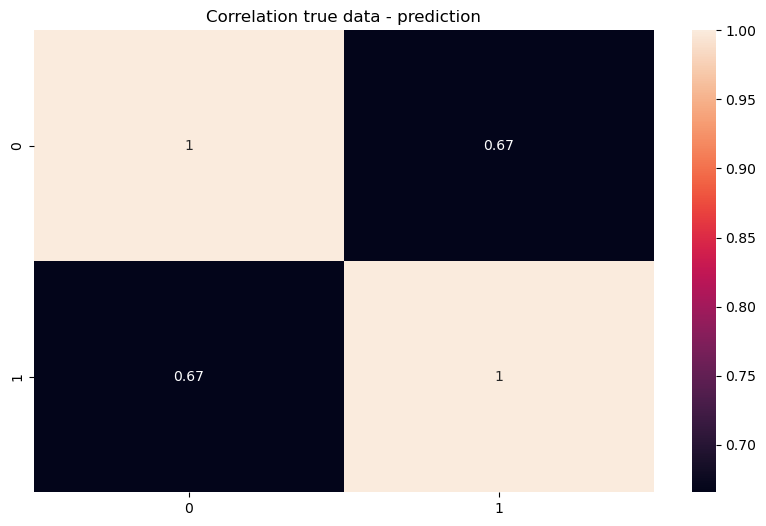

	r^2=-0.164297
Mean Absolute Error (MAE): 19.45101084278358
Mean Squared Error (MSE): 766.732578224998
Root Mean Squared Error (RMSE): 27.689936407023364
Mean Absolute Percentage Error (MAPE): 88.78
Accuracy: 11.22
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


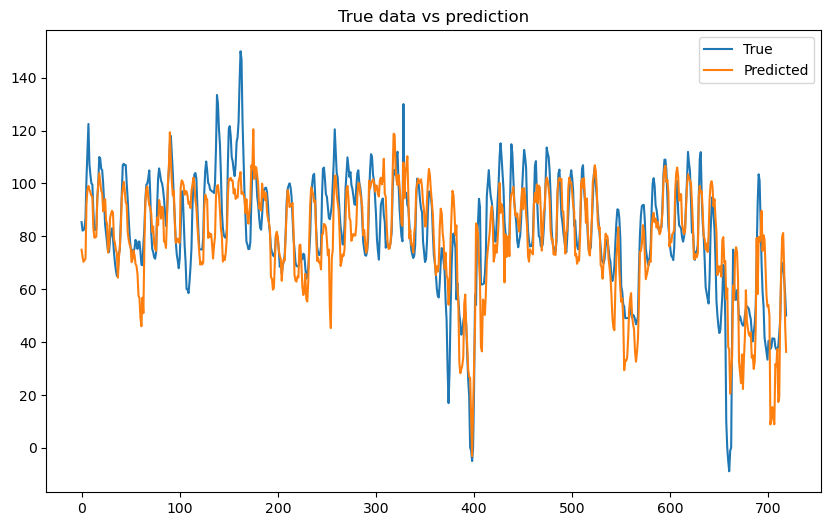

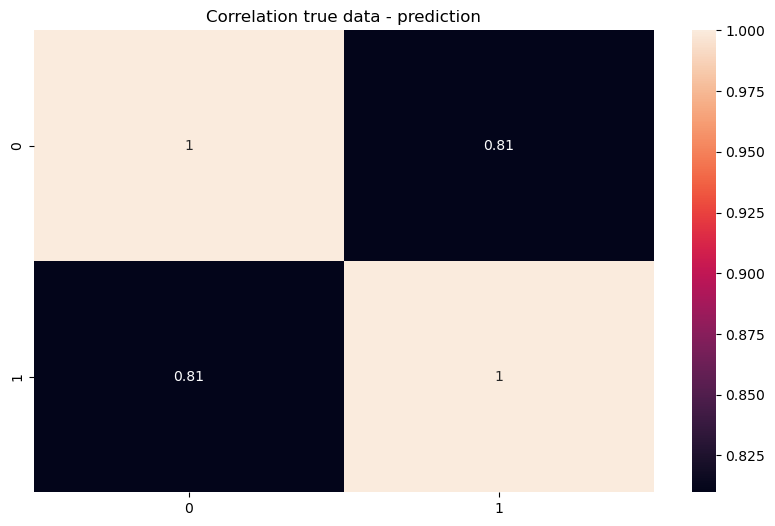

	r^2=0.636735
Mean Absolute Error (MAE): 10.046919408328677
Mean Squared Error (MSE): 176.0450287340026
Root Mean Squared Error (RMSE): 13.268196137154538
Mean Absolute Percentage Error (MAPE): 426.17
Accuracy: -326.17
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-09 23:00:00, test 2023-03-10 00:00:00 - 2023-04-08 23:00:00


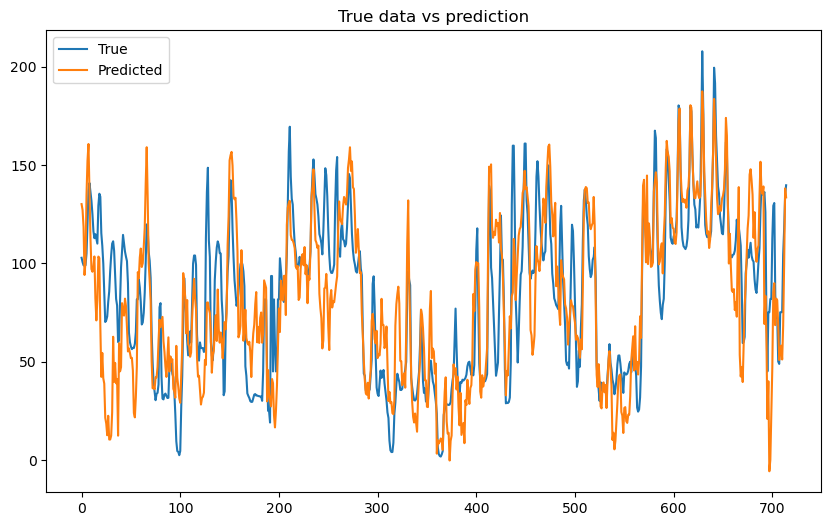

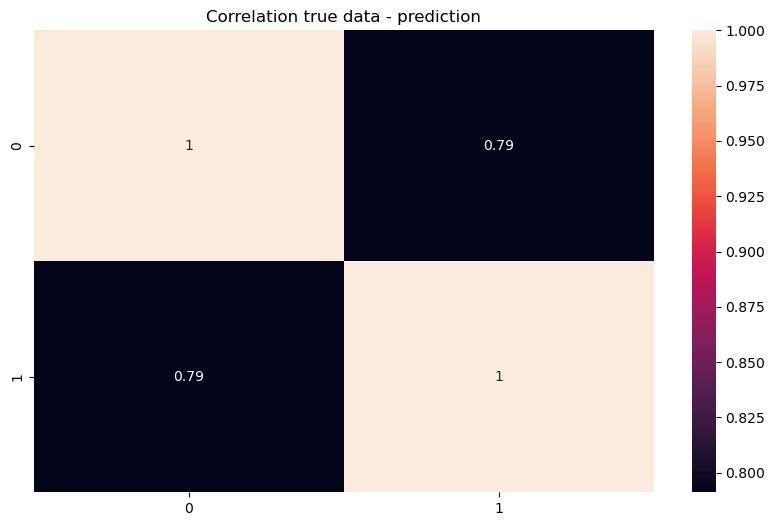

	r^2=0.566925
Mean Absolute Error (MAE): 20.445804132058484
Mean Squared Error (MSE): 691.5577271382172
Root Mean Squared Error (RMSE): 26.297485186576626
Mean Absolute Percentage Error (MAPE): 39.28
Accuracy: 60.72


In [25]:
xgb_pred_1, xgb_models_1 = run_model('xgb', df_lag, k_folds, split_method, train_start, features, target, cols_std)

### Gradient Boost

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


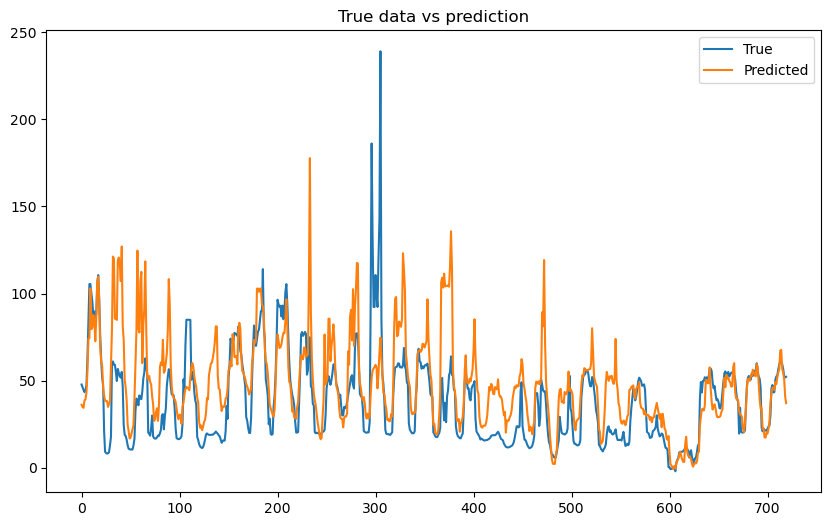

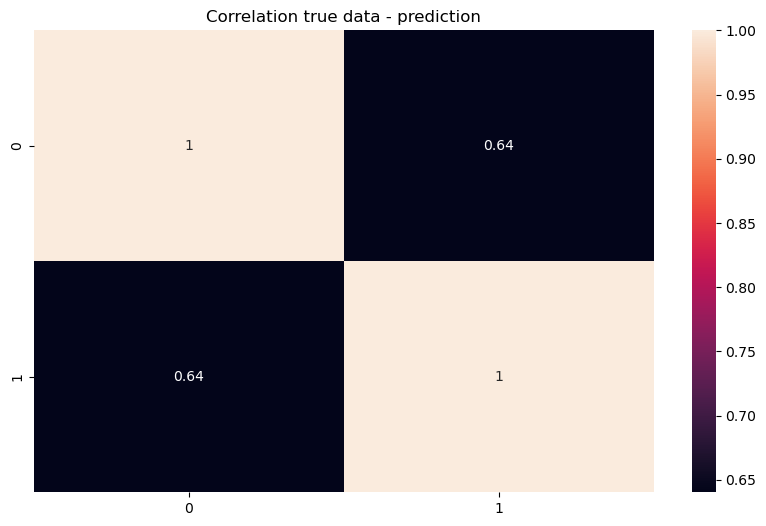

	r^2=0.134449
Mean Absolute Error (MAE): 16.53977477640785
Mean Squared Error (MSE): 569.9969608216016
Root Mean Squared Error (RMSE): 23.874609123954293
Mean Absolute Percentage Error (MAPE): 71.21
Accuracy: 28.79
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


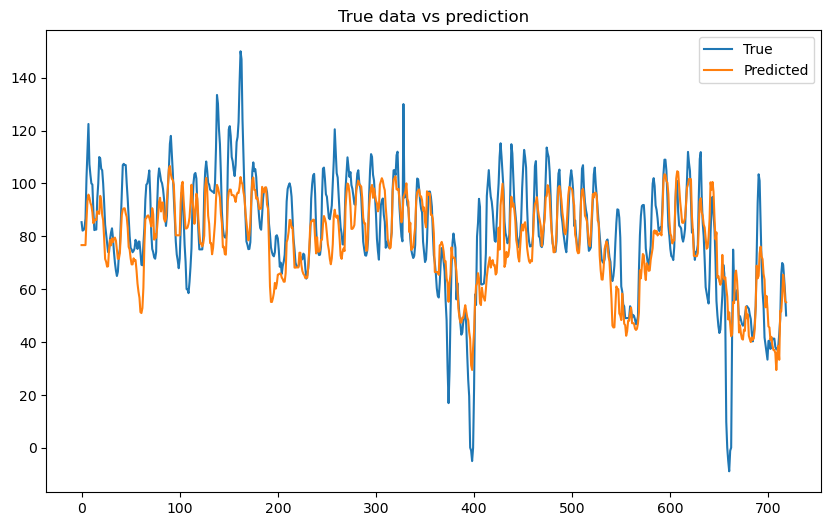

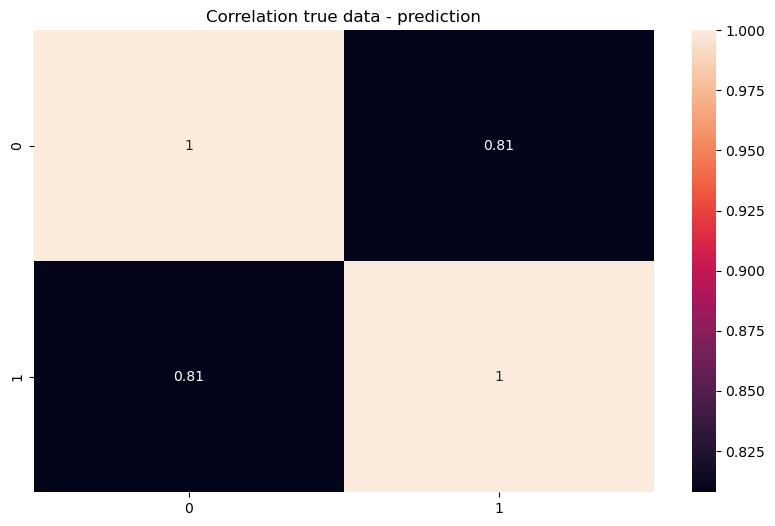

	r^2=0.626442
Mean Absolute Error (MAE): 9.873635717855253
Mean Squared Error (MSE): 181.03295662525454
Root Mean Squared Error (RMSE): 13.45484881465617
Mean Absolute Percentage Error (MAPE): 789.06
Accuracy: -689.06
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-09 23:00:00, test 2023-03-10 00:00:00 - 2023-04-08 23:00:00


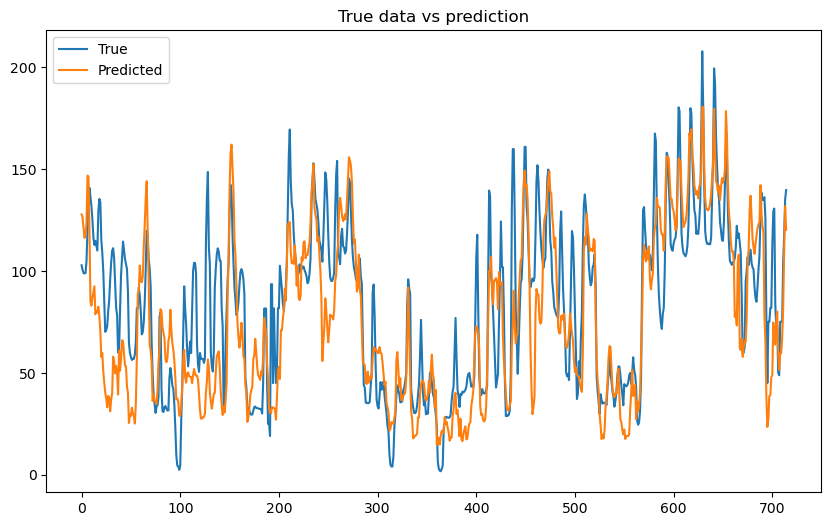

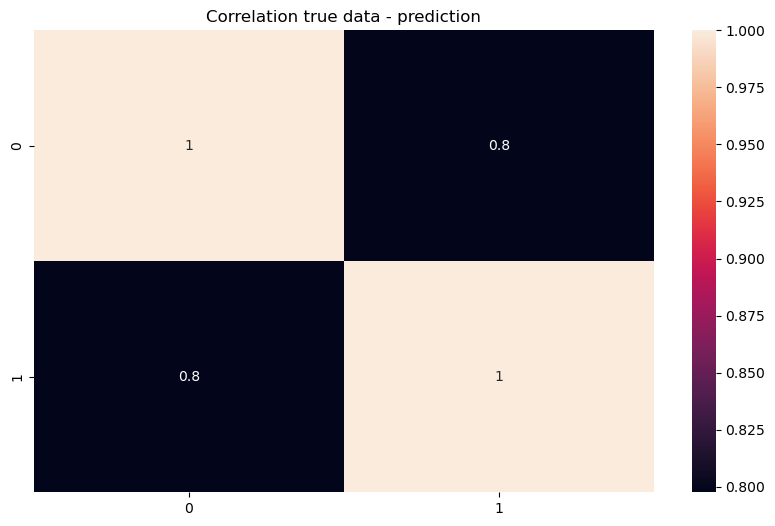

	r^2=0.556224
Mean Absolute Error (MAE): 20.94809561728291
Mean Squared Error (MSE): 708.6465828133108
Root Mean Squared Error (RMSE): 26.62041665363844
Mean Absolute Percentage Error (MAPE): 38.51
Accuracy: 61.49


In [27]:
gb_1 = run_model('gb', df_lag, k_folds, split_method, train_start, features, target, cols_std)

### LSTM

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00
Epoch 1/10
318/318 [==============================] - 5s 11ms/step - loss: 379.7197 - val_loss: 340.0260
Epoch 2/10
318/318 [==============================] - 3s 11ms/step - loss: 125.2706 - val_loss: 262.4254
Epoch 3/10
318/318 [==============================] - 3s 11ms/step - loss: 111.7302 - val_loss: 258.8541
Epoch 4/10
318/318 [==============================] - 3s 10ms/step - loss: 107.8634 - val_loss: 250.5710
Epoch 5/10
318/318 [==============================] - 3s 11ms/step - loss: 105.5532 - val_loss: 248.8387
Epoch 6/10
318/318 [==============================] - 3s 10ms/step - loss: 101.3107 - val_loss: 249.5500
Epoch 7/10
318/318 [==============================] - 3s 10ms/step - loss: 96.9193 - val_loss: 246.7794
Epoch 8/10
318/318 [==============================] - 3s 10ms/step - loss: 91.5634 - val_loss: 241.6251
Epoch 9/10
318/318 [==============================] -

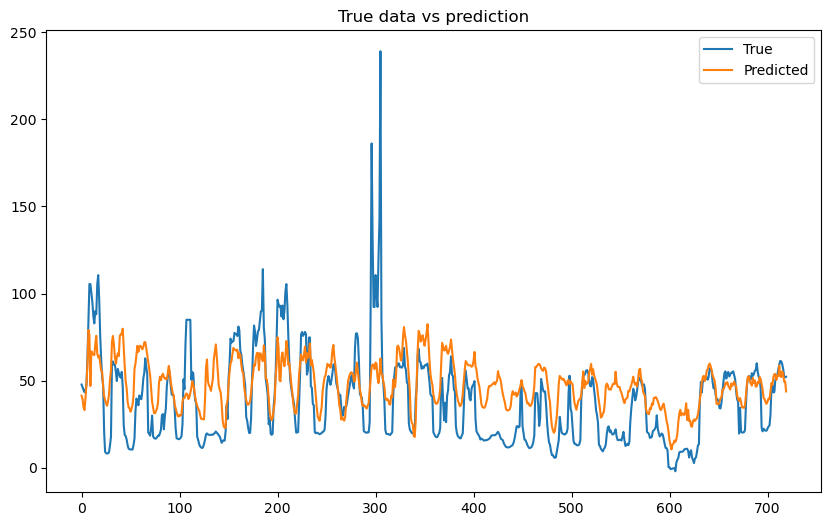

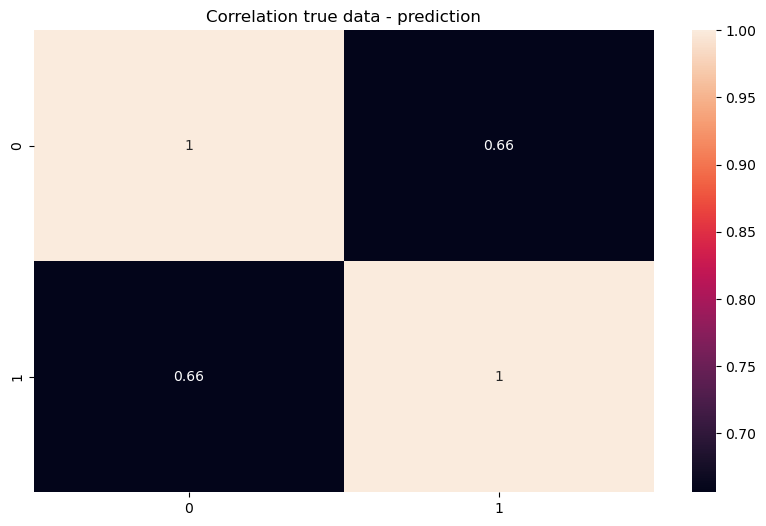

	r^2=0.277537
Mean Absolute Error (MAE): 17.04769574122959
Mean Squared Error (MSE): 475.7686344936483
Root Mean Squared Error (RMSE): 21.812121274503504
Mean Absolute Percentage Error (MAPE): 120.62
Accuracy: -20.62
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00
Epoch 1/10
381/381 [==============================] - 6s 11ms/step - loss: 339.7120 - val_loss: 472.4796
Epoch 2/10
381/381 [==============================] - 4s 11ms/step - loss: 133.5584 - val_loss: 432.8517
Epoch 3/10
381/381 [==============================] - 4s 10ms/step - loss: 119.2571 - val_loss: 428.4471
Epoch 4/10
381/381 [==============================] - 4s 10ms/step - loss: 113.9711 - val_loss: 428.4243
Epoch 5/10
381/381 [==============================] - 4s 10ms/step - loss: 109.6173 - val_loss: 409.6557
Epoch 6/10
381/381 [==============================] - 4s 10ms/step - loss: 106.4860 - val_loss: 411.0333
Epoch 7/10
381/381 [========================

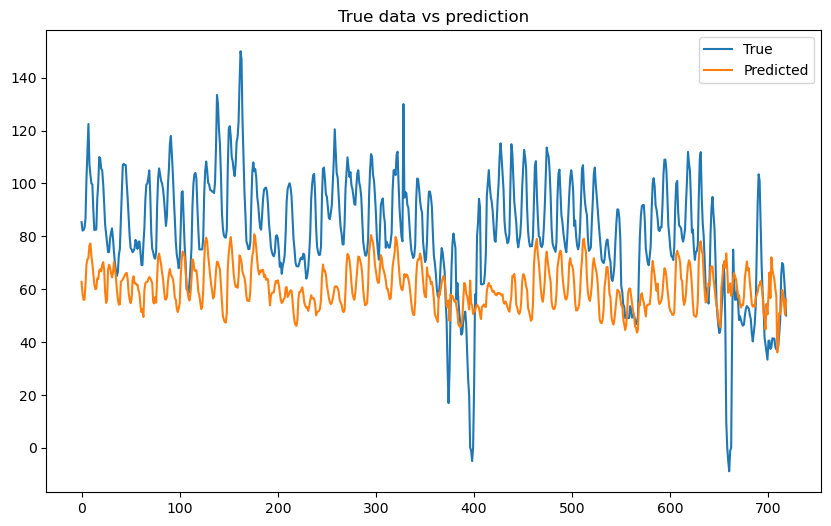

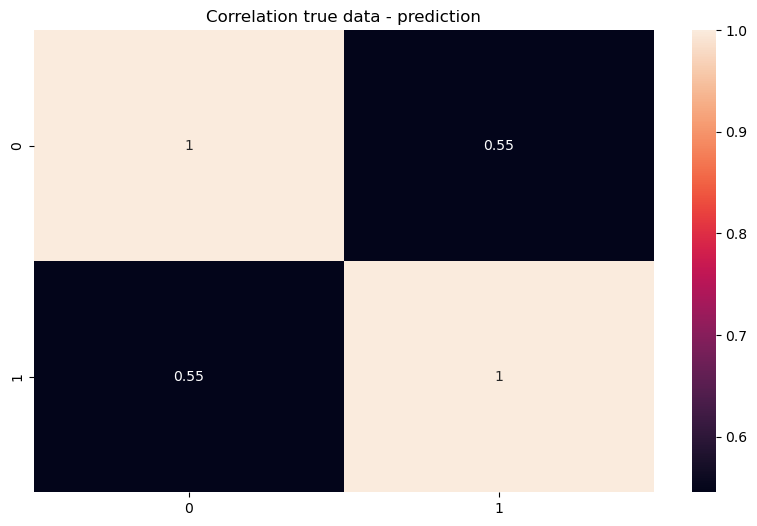

	r^2=-0.614830
Mean Absolute Error (MAE): 24.689340889284775
Mean Squared Error (MSE): 782.5759908273759
Root Mean Squared Error (RMSE): 27.97455970748022
Mean Absolute Percentage Error (MAPE): 1063.36
Accuracy: -963.36
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-09 23:00:00, test 2023-03-10 00:00:00 - 2023-04-08 23:00:00
Epoch 1/10
566/566 [==============================] - 8s 11ms/step - loss: 1585.4058 - val_loss: 23543.9434
Epoch 2/10
566/566 [==============================] - 6s 11ms/step - loss: 638.4564 - val_loss: 19965.2676
Epoch 3/10
566/566 [==============================] - 6s 10ms/step - loss: 538.2078 - val_loss: 16242.7178
Epoch 4/10
566/566 [==============================] - 6s 11ms/step - loss: 493.6471 - val_loss: 16813.7988
Epoch 5/10
566/566 [==============================] - 6s 11ms/step - loss: 451.6458 - val_loss: 16228.8447
Epoch 6/10
566/566 [==============================] - 6s 10ms/step - loss: 417.1934 - val_loss: 17146.5156
Epoch 7/10
566/566 [========

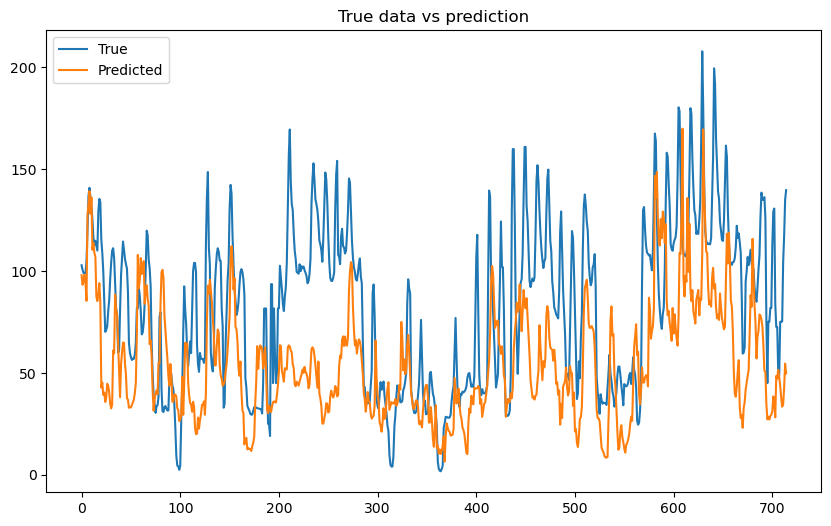

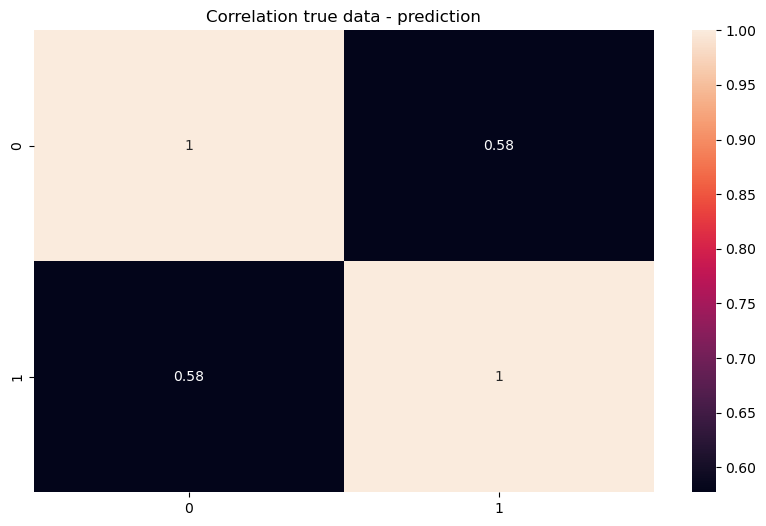

	r^2=-0.171285
Mean Absolute Error (MAE): 34.92772830522978
Mean Squared Error (MSE): 1870.3722273629623
Root Mean Squared Error (RMSE): 43.247800260394314
Mean Absolute Percentage Error (MAPE): 50.8
Accuracy: 49.2


In [26]:
lstm_1 = run_model('lstm', df_lag, k_folds, split_method, train_start, features, target, cols_std)